In [8]:
!pip install wordcloud

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

X: 
[[0 0 0 1]
 [1 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [2 0 0 0]
 [1 0 1 1]
 [0 0 1 0]
 [0 0 0 1]
 [2 2 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]]
words: ['best' 'bird' 'bush' 'early' 'gets' 'hand' 'honesty' 'in' 'is' 'money'
 'policy' 'the' 'time' 'two' 'worm' 'worth']


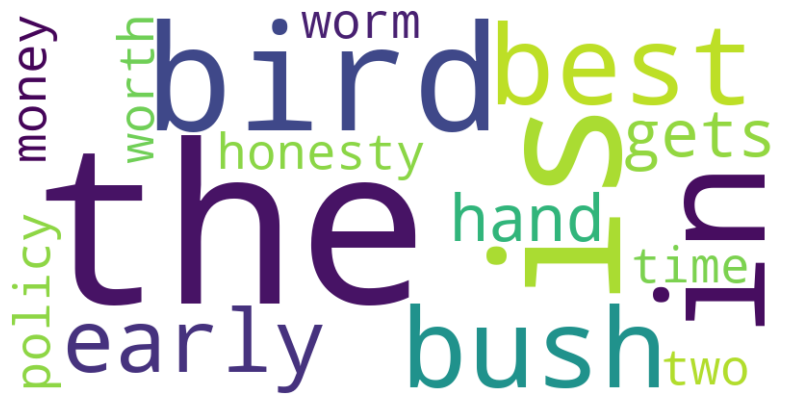

In [31]:
#Q1.1 a:

phrases = [
    "A Bird in the hand is worth two in the bush",
    "The early bird gets the worm",
    "Time is money",
    "Honesty is the best policy"
]

vectorizer = CountVectorizer()

Xfit = vectorizer.fit_transform(phrases)

X = Xfit.toarray().T

words = np.array(vectorizer.get_feature_names_out())

print("X: \n{}".format(X))
print("words: {}".format(words))

word_frequencies = dict(zip(words, X.sum(axis=1)))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


X: 
[[0 0 0 1]
 [1 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]]
words: ['best' 'bird' 'bush' 'early' 'gets' 'hand' 'honesty' 'money' 'policy'
 'time' 'two' 'worm' 'worth']


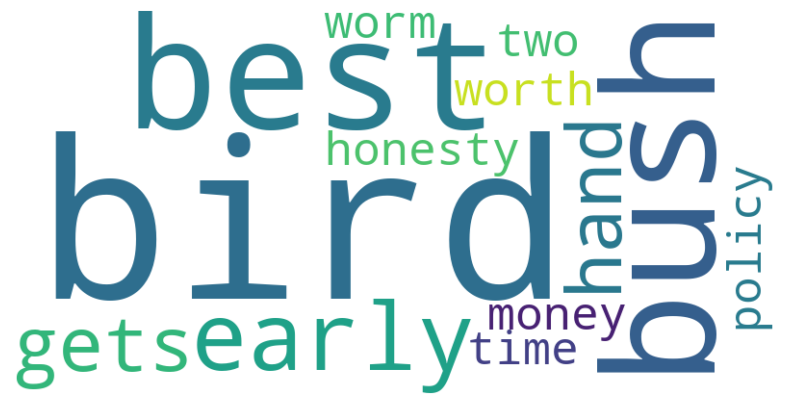

In [32]:
#Q1.1 b:

phrases = [
    "A Bird in the hand is worth two in the bush",
    "The early bird gets the worm",
    "Time is money",
    "Honesty is the best policy"
]

vectorizer = CountVectorizer(stop_words=["the", "is", "in"])

Xfit = vectorizer.fit_transform(phrases)
X = Xfit.toarray().T

words = np.array(vectorizer.get_feature_names_out())

print("X: \n{}".format(X))
print("words: {}".format(words))

word_frequencies = dict(zip(words, X.sum(axis=1)))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [33]:
#Q1.2 a:
phrases = [
    "Call me soon",
    "CALL to win",
    "Pick me up soon"
]

vectorizer = CountVectorizer()

Xfit = vectorizer.fit_transform(phrases)
X = Xfit.toarray().T

words = np.array(vectorizer.get_feature_names_out())

df = np.sum(X, axis=1).reshape(-1, 1)
df_df = pd.DataFrame(data=df, index=words, columns=["Document Frequency"])

print(df_df)


      Document Frequency
call                   2
me                     2
pick                   1
soon                   2
to                     1
up                     1
win                    1


In [34]:
#Q1.2 b:

phrases = [
    "Call me soon",
    "CALL to win",
    "Pick me up soon"
]

vectorizer = CountVectorizer()

Xfit = vectorizer.fit_transform(phrases)
X = Xfit.toarray().T

words = np.array(vectorizer.get_feature_names_out())

df = np.sum(X, axis=1).reshape(-1, 1)
n = len(phrases)

idf = np.log((1 + n) / (1 + df)) + 1
idf_df = pd.DataFrame(data=idf, index=words, columns=["Inverse Document Frequency"])

print(idf_df)


      Inverse Document Frequency
call                    1.287682
me                      1.287682
pick                    1.693147
soon                    1.287682
to                      1.693147
up                      1.693147
win                     1.693147


In [35]:
#Q1.2 c:

phrases = [
    "Call me soon",
    "CALL to win",
    "Pick me up soon"
]

vectorizer = CountVectorizer()

Xfit = vectorizer.fit_transform(phrases)
X = Xfit.toarray().T

words = np.array(vectorizer.get_feature_names_out())

df = np.sum(X, axis=1).reshape(-1, 1)
n = len(phrases)

idf = np.log((1 + n) / (1 + df)) + 1
tiff = X * idf
tiff_df = pd.DataFrame(data=tiff, index=words, columns=phrases)

print(tiff_df)


      Call me soon  CALL to win  Pick me up soon
call      1.287682     1.287682         0.000000
me        1.287682     0.000000         1.287682
pick      0.000000     0.000000         1.693147
soon      1.287682     0.000000         1.287682
to        0.000000     1.693147         0.000000
up        0.000000     0.000000         1.693147
win       0.000000     1.693147         0.000000


In [36]:
#Q1.2 d:

phrases = [
    "Call me soon",
    "CALL to win",
    "Pick me up soon"
]

vectorizer = CountVectorizer()

Xfit = vectorizer.fit_transform(phrases)
X = Xfit.toarray().T

words = np.array(vectorizer.get_feature_names_out())

df = np.sum(X, axis=1).reshape(-1, 1)
n = len(phrases)
idf = np.log((1 + n) / (1 + df)) + 1

U = X * idf
T = U / np.sqrt(np.sum(U**2, axis=0))
T_df = pd.DataFrame(data=T, index=words, columns=phrases)

print(T_df)


      Call me soon  CALL to win  Pick me up soon
call       0.57735     0.473630         0.000000
me         0.57735     0.000000         0.428046
pick       0.00000     0.000000         0.562829
soon       0.57735     0.000000         0.428046
to         0.00000     0.622766         0.000000
up         0.00000     0.000000         0.562829
win        0.00000     0.622766         0.000000


In [29]:
#Student name: Khalid Nimri
#Student ID: 2140145